In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Indexing

In [2]:
# an array for the following examples
ary = np.array(range(1,17))
ary

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

## Single-dimensional arrays

By now you're familiar with the basic syntax for indexing an array.

In [3]:
ary[5] #the 6th item

6

Numpy offers a powerful extension to indexing. The two extensions are **slicing** and **advanced indexing**.

### Advanced indexing

This tutorial focuses on the other kind of indexing, but we'll touch on **advanced indexing** briefly. There are two kinds of advanced indexing: **integer** and **boolean**.

#### Integer indexing

With integer advanced indexing, the array is accessed by a sequence of locations:

In [4]:
ary[ [3, 5, 7, 9] ]

array([ 4,  6,  8, 10])

#### Boolean indexing

With boolean advanced indexing, the array is accessed by the `True` values in an array of equal length

In [5]:
bool_index = (ary%2==0)
bool_index

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True])

In [6]:
ary[ bool_index ]

array([ 2,  4,  6,  8, 10, 12, 14, 16])

### Slice Indexing

With **slice indexing**, an array is accessed by a **slice object**. A slice object is a simple object that specifies three values: a start point, an end point, and a step. The `slice` data type is a fundamental data type on Python; a sibling of `int` and `str` and `float` &c.

In [7]:
# Here's a slice object, which starts at 0, ends at 10 (exclusive), and steps by 2.
a_slice = slice(0, 10, 2)
a_slice

slice(0, 10, 2)

In [8]:
ary[ a_slice ]

array([1, 3, 5, 7, 9])

The above is equivalent to

In [9]:
ary[ [0,2,4,6,8] ]

array([1, 3, 5, 7, 9])

Like other top-level python data types, `slice` has its own literal notation: `<start>:<stop>:<step>`. This slice literal notation is only allowed within the square brackets of subscript notation. The above can be written:

In [10]:
ary[ 0:10:2 ]

array([1, 3, 5, 7, 9])

It's important to understand: this is a notational convenience.

In [11]:
print( ary[ 0:10:2 ] )
print( ary[ slice(0,10,2) ] )

[1 3 5 7 9]
[1 3 5 7 9]


Every value in a slice is optional. When `step` is omitted, a slice can be written `<start>:<stop>`. Here are some things you can express with a slice:

* All values

In [12]:
ary[ : ]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

* All values 
 * starting with an index
 * Ending with an index
 * Between two indices

In [13]:
# starting with an index
ary[ 8: ]

array([ 9, 10, 11, 12, 13, 14, 15, 16])

In [14]:
# ending with an index
ary[ :11 ]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [15]:
# between two indices
ary[ 8:11 ]

array([ 9, 10, 11])

In [16]:
#between two indices in reverse
ary[ 11:8:-1 ]

array([12, 11, 10])

* The entire array, but every other item

In [17]:
ary[ ::2 ]

array([ 1,  3,  5,  7,  9, 11, 13, 15])

* The entire array, in reverse.

In [18]:
ary[ ::-1 ]

array([16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

### Assignment with slicing

Using a slice as a index returns a **view** of the original array, which you can use to assign to the original array. 

In [19]:
ary

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [20]:
ary[ 6:12 ] = [34,35,36,37,38,39]

In [21]:
ary

array([ 1,  2,  3,  4,  5,  6, 34, 35, 36, 37, 38, 39, 13, 14, 15, 16])

## Two-Dimensional Arrays (aka Matrices)

With a two-dimensional array, each item has not just one index, but two. Traditionally, the first index is thought of as the item's `row`, and the second as its `column`. This is a semantic crutch, of course; the math doesn't really care how you think about it geometrically. Here's an example of a two-dimensional array:

### `matrix` vs `vector` vs `array`

`numpy` doesn't distinguish between vectors and matrices, they're all just array objects of different shapes.

> **Side note**: `numpy` does have a `matrix` class. It's depricated!

For example, a vector is a single-dimensional array. A vector **does not have a second dimension**.


In [64]:
v = np.array([1,2,3,4,5])
print( "our vector", v )
print( "this is what kind of thing it is:", type(v))
print( "this is it's shape:", v.shape)

our vector [1 2 3 4 5]
this is what kind of thing it is: <class 'numpy.ndarray'>
this is it's shape: (5,)


A `row vector` refers to a matrix with a single row. Use `reshape` to convert between different shapes.

In [76]:
# convert vector to matrix with 1 row and 5 columns
v.reshape(1,5)

array([[1, 2, 3, 4, 5]])

If one dimension of a reshaped matrix would be fully specified by the other dimensions, supply `-1` to reshape to have the size of that dimension specified by the others. This is a common numpy idiom for changing the dimensionality of an array.

In [79]:
# if there is 1 row, there must be 5 columns; let numpy figure that out for us
v.reshape(1,-1)

array([[1, 2, 3, 4, 5]])

Along similar lines, we can specify a `column vector`: a 2d matrix with only 1 column.

In [80]:
v.reshape(-1,1)

array([[1],
       [2],
       [3],
       [4],
       [5]])

We can also stack vectors into a matrix:

In [123]:
# use "stack"
np.stack( (v,v,v) )

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

In [124]:
# same thing, using "broadcast_to"
np.broadcast_to( v, (3,len(v)) )

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

## Accessing a 2d array

In [125]:
A = np.load("data/spritebw.npy")
A

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.186, 0.186, 0.186],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.608, 0.608, 0.608,
        0.608, 0.608, 0.   , 0.   , 0.186, 0.186, 0.186],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.619, 0.619, 0.619, 0.619,
        0.619, 0.619, 0.619, 0.619, 0.619, 0.186, 0.186],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.57 , 0.57 , 0.57 , 0.186,
        0.186, 0.57 , 0.186, 0.   , 0.57 , 0.57 , 0.57 ],
       [0.   , 0.   , 0.   , 0.   , 0.57 , 0.186, 0.57 , 0.186, 0.186,
        0.186, 0.57 , 0.186, 0.186, 0.186, 0.57 , 0.57 ],
       [0.   , 0.   , 0.   , 0.   , 0.57 , 0.186, 0.57 , 0.57 , 0.186,
        0.186, 0.186, 0.57 , 0.186, 0.186, 0.186, 0.57 ],
       [0.   , 0.   , 0.   , 0.   , 0.57 , 0.57 , 0.186, 0.186, 0.186,
        0.186, 0.57 , 0.57 , 0.57 , 0.57 , 0.57 , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.186, 0.186, 0.186,
        0.186, 0.186, 0.18

When dealing with matrices it can be useful to visualize them as an image. The default behavior of `plt.imshow` is to draw each row in the matrix as a row of pixels, with the 0th row as the top row.

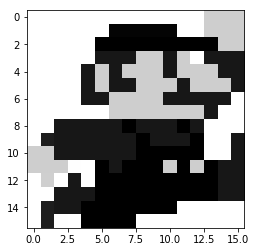

In [126]:
fig, ax = plt.subplots()
ax.imshow( A, cmap="Greys" )

Whereas with a one-dimensional array we index one dimension, with a two-dimensional array we use two indices:

In [127]:
A[ 8,8 ]

0.57

Obvious enough. But like a one-dimensional array, we can use slices:

In [128]:
# get all items with i=0; j=all values
# which is to say, the first row
i = 0
j = slice(None,None)
A[ i, j ]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.186, 0.186, 0.186])

The same thing, in more compact form:

In [129]:
# the first row
A[ 0, :: ]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.186, 0.186, 0.186])

In [130]:
# the first five rows
A[ 0:5, :: ]

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.186, 0.186, 0.186],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.608, 0.608, 0.608,
        0.608, 0.608, 0.   , 0.   , 0.186, 0.186, 0.186],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.619, 0.619, 0.619, 0.619,
        0.619, 0.619, 0.619, 0.619, 0.619, 0.186, 0.186],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.57 , 0.57 , 0.57 , 0.186,
        0.186, 0.57 , 0.186, 0.   , 0.57 , 0.57 , 0.57 ],
       [0.   , 0.   , 0.   , 0.   , 0.57 , 0.186, 0.57 , 0.186, 0.186,
        0.186, 0.57 , 0.186, 0.186, 0.186, 0.57 , 0.57 ]])

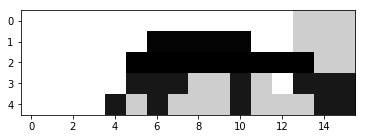

In [131]:
#visualize the first five rows

fig, ax = plt.subplots()
B = A[ 0:5, :: ]
ax.imshow( B, cmap="Greys" )

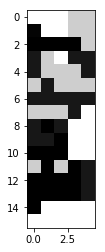

In [132]:
# the middle 5 columns

fig, ax = plt.subplots()
B = A[ ::, 10:15 ]
ax.imshow( B, cmap="Greys" )

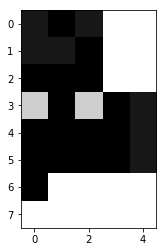

In [133]:
# A slice from the middle of a matrix

fig, ax = plt.subplots()
B = A[ 8:16, 10:15 ]
ax.imshow( B, cmap="Greys" )

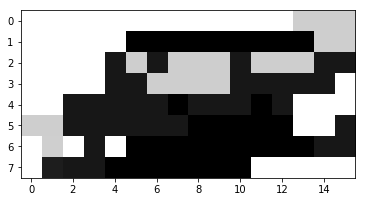

In [134]:
# Every other row:

fig, ax = plt.subplots()
B = A[ ::2, :: ]
ax.imshow( B, cmap="Greys" )

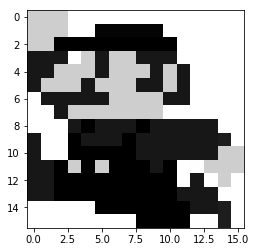

In [135]:
# Index one of the dimensions in reverse order:

fig, ax = plt.subplots()
B = A[ ::, ::-1 ]
ax.imshow( B, cmap="Greys" )

## 3-dimensional matrices

Why stop at 2 dimensions? Here's a 3-dimensional matrix.

In [33]:
A = np.load("data/sprite.npy")
A

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 204, 103],
        [255, 204, 103],
        [255, 204, 103]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [238,  63,  60],
        [238,  63,  60],
        [238,  63,  60],
        [238,  63,  60],
        [238,  63,  60],
        [255, 255, 255],
        [255, 255, 255],
        [255, 204, 103],
        [255, 204, 103],
        [255, 204, 103]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [239,  59,  58],
        [239,  59,  58],
        [239,  59,  5

As before, an item in the matrix is indexed by a tuple with an item for each dimension.

In [34]:
index_tuple = (8,8,1)
A[index_tuple]

104

As with a two-dimensional array it's helpful to name the dimensions.
* 1st dimension: `row`
* 2nd dimension: `column`
* 3rd dimension: `layer`

We can check the size of each dimension:

In [35]:
A.shape

(16, 16, 3)

There are 16 rows, 16 columns, and 3 layers. We can look at each layer, again using `imshow`.

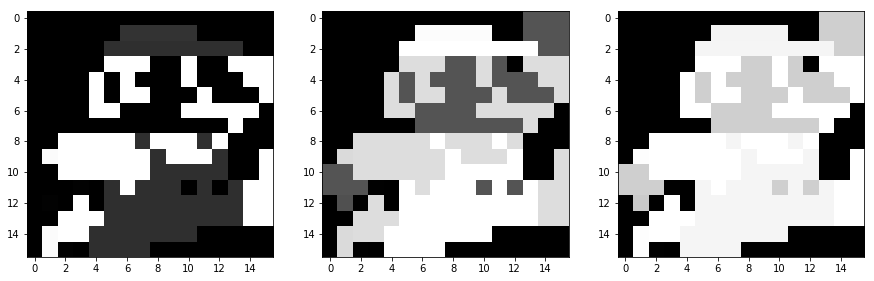

In [36]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].imshow( A[ ::, ::, 0 ], cmap="Greys" )
ax[1].imshow( A[ ::, ::, 1 ], cmap="Greys" )
ax[2].imshow( A[ ::, ::, 2 ], cmap="Greys" )

In some cases it may be useful to draw multiple matrix layer at the same time by drawing each matrix layer as a different color:

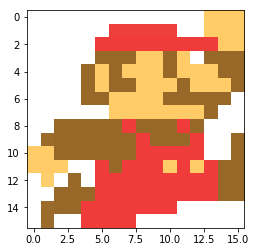

In [37]:
fig, ax = plt.subplots()
ax.imshow( A )

All the indexing tricks we've worked so far work exactly the same way.

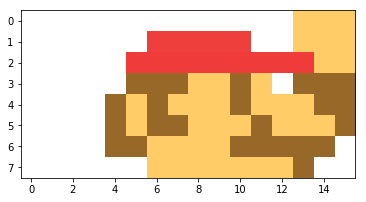

In [38]:
# show only some rows

fig, ax = plt.subplots()
ax.imshow( A[0:8:, ::, ::] )

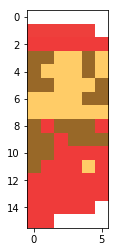

In [39]:
# show only some columns

fig, ax = plt.subplots()
ax.imshow( A[::, 6:12, ::] )

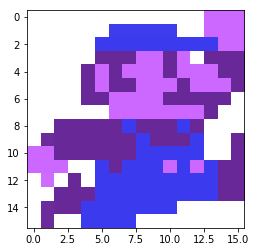

In [48]:
# shuffle the colors (rgb) -> (gbr)

fig, ax = plt.subplots()
ax.imshow( A[:, :, [1,2,0]] )

In [40]:
# slice out only some layers

# only red and green layers
A[::, ::, 0:2]

# PLT will refuse to show this one

array([[[255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 204],
        [255, 204],
        [255, 204]],

       [[255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [238,  63],
        [238,  63],
        [238,  63],
        [238,  63],
        [238,  63],
        [255, 255],
        [255, 255],
        [255, 204],
        [255, 204],
        [255, 204]],

       [[255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [239,  59],
        [239,  59],
        [239,  59],
        [239,  59],
        [239,  59],
        [239,  59],
        [239,  59],
        [239,  59],
        [239,  59],
        [255, 204],
        [255, 204]],

       [[255, 255],
        [255, 

## n-dimensional matrices

Numpy matrices can have any number of dimensions.

A 4-dimensional matrix might be used to hold an _animation_, where the 4th dimension is the _frame number_. In that case, you could get i,jth pixel of every frame with:

`animation[ i, j, ::, :: ]`

Which would return a 2-dimensional matrix where every row is a 3-tuple of color values, and each column is an animation frame.

Red layer of every frame: 

`animation[ ::, ::, 0, :: ]`

Only the zth frame:

`animation[ ::, ::, ::, z ]`

Furthermore you could hold a _collection_ of animations (all with the same width, height, number of colors, and frame count) with a five-dimensional matrix, where the 5th dimension is the animation number. (Further: a 6-dimensional matrix holding an archive of collections &c &c).



## Bonus Stuff

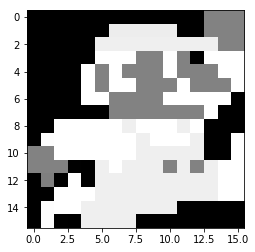

In [41]:
# show sum of all colors
plt.imshow( A.sum(axis=2), cmap="Greys" )

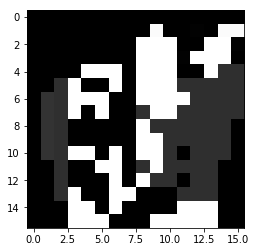

In [42]:
# transpose reverses all dimensions
# (row,col,layer) -> (layer, col, row)

# B[0] is the red layer, in (col,row) order.
B = A.T
plt.imshow( B[0], cmap="Greys" )

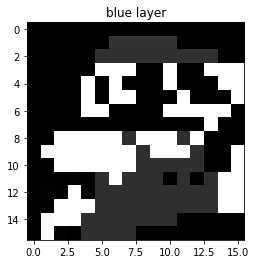

In [56]:
# np.tranpose allows to set the order of tranposed dimensions

# in this case, B[0] is the red layer in (row,col) order.
fig,ax = plt.subplots()

B = np.transpose(A, axes=(2,0,1))
ax.set_title("blue layer")
ax.imshow( B[0], cmap="Greys" ) # B[0] == B[0, ::, ::]

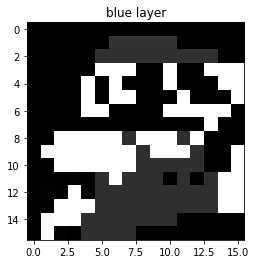

In [57]:
# use ellipses (another long-lost top-level type literal) to stand for all axes _before_ an axis.

fig,ax = plt.subplots()
ax.set_title("blue layer")
ax.imshow( A[..., 0], cmap="Greys" ) # A[..., 0] == A[::, ::, 0]

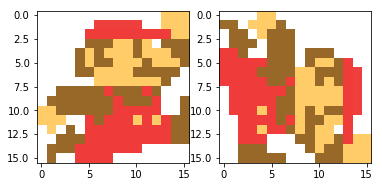

In [45]:
# combine numpy tricks to do elegant stuff
# rotating 90 degree is the row-reverse of the transpose

fig,ax = plt.subplots(1,2)

 
ax[0].imshow(A)

# flip the first to axes
B = np.transpose(A, axes=(1,0,2))
# reverse the rows
B = B[:,::-1,:]
ax[1].imshow(B)

## Pairwise operations

Most scalar operations between two numpy arrays of the same shape will perform perform the scalar operation on all corresponding pairs.

In [136]:
u = np.array([1,2,3,4,5])
v = np.array([5,7,9,1,2])

In [139]:
# addition, subtraction
u+v, i-v

(array([ 6,  9, 12,  5,  7]), array([-5, -7, -9, -1, -2]))

In [141]:
# multplication, division
u*v, u/v

(array([ 5, 14, 27,  4, 10]),
 array([0.2       , 0.28571429, 0.33333333, 4.        , 2.5       ]))

In [142]:
# even exponentiation and modulo
u**v, u%v

(array([    1,   128, 19683,     4,    25]), array([1, 2, 3, 0, 1]))

This works on arrays of any shape.

In [145]:
A = np.array( [[1,2],[3,4]] )
B = np.array( [[5,6],[7,8]] )

A*B # note - pairwise multiplication, NOT matrix multiplication

array([[ 5, 12],
       [21, 32]])

## Broadcasting operations

If two operands do have the same shape, but the operand of lower dimension will be **broadcast** to higher dimensions.

In [173]:
A = np.arange(4*3).reshape(4,3)
v = np.array([0,1,10])

In [174]:
A*v

array([[  0,   1,  20],
       [  0,   4,  50],
       [  0,   7,  80],
       [  0,  10, 110]])

This is the same as:

In [175]:
A * np.broadcast_to(v, A.shape)

array([[  0,   1,  20],
       [  0,   4,  50],
       [  0,   7,  80],
       [  0,  10, 110]])

You can think of scalar operations as broadcast operations:

In [176]:
A*3

array([[ 0,  3,  6],
       [ 9, 12, 15],
       [18, 21, 24],
       [27, 30, 33]])

In [177]:
A * np.broadcast_to(3, A.shape)

array([[ 0,  3,  6],
       [ 9, 12, 15],
       [18, 21, 24],
       [27, 30, 33]])

## The Dot Product

Imagine a series of prices:

In [180]:
p_chicken, p_bread, p_chocolate, p_apples = 3.5, 2.5, 1.0, 0.5

Further, imagine we have an order for the given goods.

In [182]:
n_chicken, n_bread, n_chocolate, n_apples = 1, 2, 5, 3

The total bill will be

In [183]:
n_chicken*p_chicken + n_bread*p_bread + n_chocolate*p_chocolate + n_apples*p_apples

15.0

Of course, we can accomplish this same procedure with two arrays, and a pairwise multiplication.

In [184]:
p = np.array( [3.5, 2.5, 1.0, 0.5] )
n = np.array( [1, 2, 5, 3] )
(p*n).sum()

15.0

This is the dot product, for which numpy supplies a function:

In [188]:
np.dot(p, n)

15.0

The dot product is a common operation. It's common to note its geometrical interpretations:

The length of a vector (it's **norm**), is the square root of the dot product.

$$ ||x|| = \sqrt{\sum{x_i^2}} = \sqrt{\vec{x} \cdot \vec{x}}$$

The cosine between to vectors is easily expressed in terms of the dot product. This is a measure of vector difference that translates well to very high-dimensional space (eg, thousands of dimensions).

$$cos(\theta) = \frac{\boldsymbol{x} \cdot \boldsymbol{y}}{||\boldsymbol{x}|| \text{ } ||\boldsymbol{y}||}$$


Maybe most importantly a dot product **calculates the result of a linear equation**, where one vector represents the coefficients, and the other the variables.

## `numpy` and dot products

The dot product is simple to express in numpy notation - why use the `dot` function?

In [222]:
A = np.arange(12).reshape(3,4)
v = np.array( [5,10,15,20] )
print( A )
print()
print( v )

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

[ 5 10 15 20]


If `A` is a 2d matrix an `v` a 1d matrix, np.dot performs the dot product of `v` against every row in `A`.

In [223]:
np.dot(A, v)

array([100, 300, 500])

Remember the algebraic interpration of the dot product - the evaluation of a set of coefficients by a set of variables.

With `np.dot` we can evaluate a single set of variables `v` against a list of coefficient-sets.

This is, of course, multiplication of a matrix by a vector; and the **system-of-equations interpretation** of matrices.

## The dot product and matrix multiplication

With the product of two matrices

$$ AB = C $$

means that the value of the cell in row i and column j is:

$$ c_{ij} = \vec{a}_i \cdot \vec{b}_j $$

In [231]:
B = np.array([[5,0],
              [10,0],
              [15,0],
              [20,1]])

In [232]:
np.dot(A, B)

array([[100,   3],
       [300,   7],
       [500,  11]])

In [241]:
# a notational shortcut

In [242]:
A @ B

array([[100,   3],
       [300,   7],
       [500,  11]])

In to the system-of-equations interpretation:

* $A$ is a series of row vectors, each with a set of coefficeints.
* $B$ is a series of column vectors, each with a set of variable values.
* $c_{ij}$ is the evaluation of the linear equation formed by coefficients $\vec{a_i}$ and variable values $\vec{b_j}$.

## A few more knobs on the numpy linear algebra airplane

The identity matrix

In [250]:
I = np.identity(max(A.shape))

In [251]:
A @ I == A

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

Once again, the transpose

In [252]:
A.T

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

## The Matrix Inverse

Reverting back to the algebraic facet of linear algebra - given matrix $A$, there exist matrices $I$ and $A$ such that:

$$AI = A$$
$$A^{-1}A = I$$

Applying some (as of this document, implicitly defined) matrix algebra:

$$Ax = y$$
$$A^{-1}Ax = A^{-1}y$$
$$Ix = A^{-1}y$$
$$x = A^{-1}y$$

If $A$ and $y$ represent a series of linear equations, the very convenient $A^{-1}$ gives us the solution for _any_ vector $y$.

For a certain class of $A$ ("non-singular" matrices), the inverse exists and is computationally feasible to obtain.

However, the inverse does not always exist. In the case of very large matrices, the inverse may be computationally unfeasible to obtain in the closed form.

In [270]:
A = np.array([[2,2,3],
              [4,12,6],
              [7,8,9]])
y = np.array([12,13,14])
Ainv = np.linalg.inv(A)

In [276]:
np.around( (Ainv @ A), decimals=2 )

array([[ 1.,  0., -0.],
       [-0.,  1., -0.],
       [ 0.,  0.,  1.]])

In [278]:
x = Ainv @ y

In [282]:
A @ x

array([12., 13., 14.])

## Eigenvectors

An eigvenvector of `A` is a vector whose direction does not change as a result of matrix multiplication by `A`.

In [299]:
A = A/A.sum(axis=0)
A

array([[0.15384615, 0.09090909, 0.16666667],
       [0.30769231, 0.54545455, 0.33333333],
       [0.53846154, 0.36363636, 0.5       ]])

In [300]:
eigvals, eigvecs = np.linalg.eig(A)

In [301]:
eigvec0 = eigvecs[:,0]
eigvec0

array([-0.21231049, -0.66726153, -0.71392318])

In [302]:
A @ eigvec0 

array([-0.21231049, -0.66726153, -0.71392318])

In a case where a `A` specifies the parameters of a state change, and `Ax` is an expression for the changed state, the eigenvector is a vector for which `A` would _not result in a change_. In cases where repeated state changes converge upon a value, the convergence value is an eigenvector, because it is a state which remains the same after the state change operation is applied.